In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from stl import mesh
import math
import trimesh
import scipy
from scipy import interpolate
import numpy.ma as ma
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import io
from PIL import Image, ImageOps
import statistics as st

In [2]:
# Load mesh
def load_mesh(f_name):
    '''
    f_name: (string) name of the mesh file to load
    '''
    mesh = trimesh.load(f_name)
    return mesh

### Heatmap version 1

In [3]:
def heatmap(mesh, path,name, dpi,):
    """
    Creates heatmap on xy positions with z as color; set min and max scale
    """
    x = mesh.vertices[:,0]
    y = mesh.vertices[:,1]
    z = mesh.vertices[:,2]

    xy = np.column_stack([x.flat, y.flat]) # Create a (N, 2) array of (x, y) pairs.

    # plt.scatter(x, y)
    # plt.axis('scaled')
    # plt.savefig(f'./direct_mill/heatmap/scatterplot/{name}.png', dpi=300)

    # plt.tricontourf(x, y, z)
    # plt.axis('scaled')
    # plt.savefig(f'./direct_mill/heatmap/tricontourf/{name}.png', dpi=dpi)

    # Interpolate and generate heatmap:
   
    grid_x, grid_y = np.mgrid[x.min():x.max():1000j, y.min():y.max():1000j]
    for method in ['linear'] : # other methods: nearest, cubic -> bad results
        plt.figure(figsize = (128/dpi, 128/dpi), frameon=False)
        grid_z = scipy.interpolate.griddata(xy,z,(grid_x, grid_y), method=method)
        plt.pcolormesh(grid_x, grid_y, ma.masked_invalid(grid_z), cmap='RdBu', vmin=np.nanmin(grid_z), vmax=np.nanmax(grid_z))
        # plt.title('{0} interpolation'.format(method))
        #plt.colorbar()
        plt.axis('scaled')
        plt.axis('off')
        plt.savefig(f'./direct_mill/heatmap/{path}/{name}.png', dpi=dpi)
        plt.clf()
        plt.close()

    plt.clf()
    plt.close()

### Heatmap version 2

In [3]:
def layered_heatmap(mesh, name, dpi, path):
    x = mesh.vertices[:,0]
    y = mesh.vertices[:,1]
    z = mesh.vertices[:,2]

    levels = [0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0]

    plt.tricontourf(x, y, z, levels=levels, extend='max')
    plt.axis('scaled')
    plt.colorbar()
    plt.savefig(f'./direct_mill/heatmap/{path}/{name}.png', dpi=dpi)
    plt.clf()
    plt.close()

In [90]:
def heatmap2(shell_mesh, name, color, dpi):
    """
    Creates heatmap on xy positions with z as color; set min and max scale
    """
    method = 'linear'


    x = shell_mesh.vertices[:,0]
    y = shell_mesh.vertices[:,1]
    z = shell_mesh.vertices[:,2]
    xy = np.column_stack([x.flat, y.flat]) # Create a (N, 2) array of (x, y) pairs.
    method = 'linear'

    grid_x, grid_y = np.mgrid[x.min():x.max():1000j, y.min():y.max():1000j]
    plt.figure(figsize = (8,8))
    grid_z = scipy.interpolate.griddata(xy,z,(grid_x, grid_y), method=method)
    plt.pcolormesh(grid_x, grid_y, ma.masked_invalid(grid_z), cmap=color, vmin=-5, vmax=25)
    #plt.colorbar()
    plt.axis('scaled')
    plt.xlim(x.min(),x.max())
    plt.ylim(y.min(),y.max())

    plt.axis('off')
    plt.savefig(f'./pics/{name}_{color}.png', dpi=dpi, facecolor = 'black', transparent=False) 
    plt.show()
    plt.clf()
    plt.close()

In [77]:
def crop_img(img, path):
    width, height = img.size

    left = width / 20
    top = 0
    right = width 
    bottom = height

    im = img.crop((left, top, right, bottom))

    im.save(path + '.png')


In [66]:
def flip_img(img, name, color):
    new = ImageOps.flip(img)
    new.save(f'./pics/{name}_{color}_flip.png')

### Create

/var/folders/22/bn4mmsxs781225ggrbdzf_hc0000gn/T/ipykernel_2922/3654326179.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(grid_x, grid_y, ma.masked_invalid(grid_z), cmap=color, vmin=-5, vmax=25)


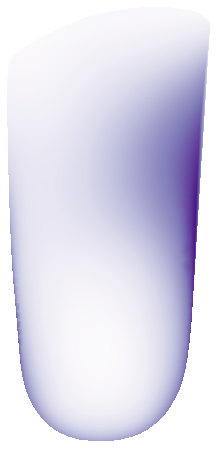

In [91]:
dpi = 192 # change this based on monitor dpi
name = '237136L.stl'
color = 'Purples'

shell = load_mesh(os.path.join('./stl/'+ name))
name = name.split('.')[0]
heatmap2(shell, name, color, dpi)
shell_img = Image.open(f'./pics/{name}_{color}.png')
flip_img(shell_img, name, color)

new_shell = shell_img = Image.open(f'./pics/{name}_{color}_flip.png')
resize = new_shell.resize((512,512))
resize.save(f'./pics/237136L_resized.png')

### View grid format

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import mpldatacursor


In [4]:
def show_cut(foot_arr, line_y, rect=False):
    """Returns foot_arr image with horizontal line at y = line_y or rectangle if rect=True"""
    fig, ax = plt.subplots()
    fig = plt.axhline(y=line_y, color='r', linestyle='-')
    ax.imshow(foot_arr, interpolation='none')
    if rect:
        rect = matplotlib.patches.Rectangle((0, 0),128,line_y, edgecolor='r', facecolor="r")
        #rectagnel start position (x,y), width, height, , 
    ax.add_patch(rect)
    plt.show()
    plt.clf()
    plt.close()

In [5]:
def fill_foot(foot_arr, line_y):
    fig, ax = plt.subplots()
    fig = plt.axhline(y=line_y, color='b', linestyle='-')
    ax.imshow(foot_arr, interpolation='none')
    rect = matplotlib.patches.Rectangle((0, 0),128,line_y, edgecolor='b', facecolor="b")
        #rectagnel start position (x,y), width, height, , 
    ax.add_patch(rect)

In [6]:
def find_cut(img_arr):
    """Returns y coordinate of non-black pixel closest to the top of the image"""
    coords = np.column_stack(np.where(img_arr > 10))
    return coords[:,0].min()

In [7]:
all_y_min = []
for name in os.listdir(os.path.join('./ML_heatmaps/foot_L/')):
    shell = Image.open('./ML_heatmaps/shell_L/' + name)
    #foot =  Image.open('./ML_heatmaps/foot/' + name)
    shell_arr = np.array(shell)
    y_min = find_cut(shell_arr)
    all_y_min.append(y_min)
    #foot_arr = np.array(foot)
    #show_cut(shell_arr, 32)
    #show_cut(foot_arr, 30)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f868fc720a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f868fc66d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f868fc6ccd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f868fc5e760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f868fc72460>],
 'means': []}

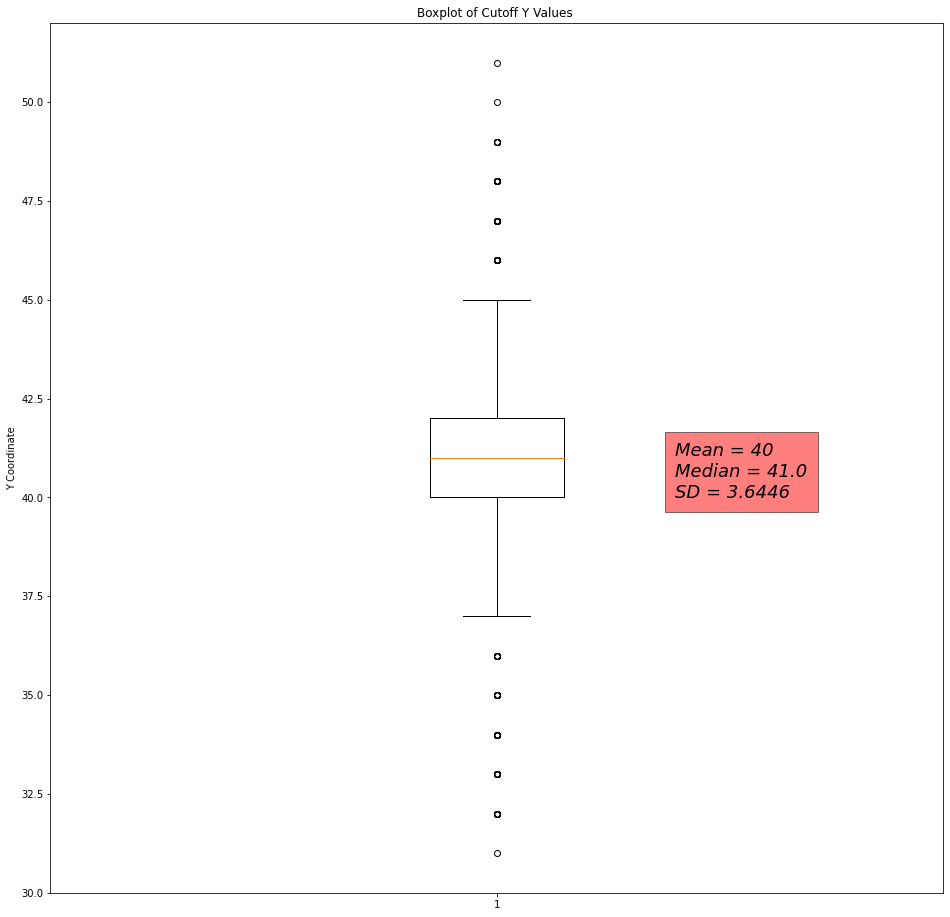

In [11]:
mean = st.mean(all_y_min)
median = st.median(all_y_min)
sd = np.std(all_y_min)

t_mean = 'Mean = ' + str(round(mean,4))
t_median = 'Median = ' + str(round(median,4))
t_sd = 'SD = ' + str(round(sd,4))

fig, ax = plt.subplots(facecolor=(1, 1, 1), figsize=(16,16))
ax.set_title('Boxplot of Cutoff Y Values ')
#ax.set_ylim([0,250])
ax.set_ylabel('Y Coordinate')
ax.text(1.2, mean, t_mean + '\n'+ t_median + '\n'+ t_sd, style='italic',bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, fontsize=18)

ax.get_xticklabels() + ax.get_yticklabels()
ax.boxplot(all_y_min)

(array([  1.,   0.,  22.,   0.,   0.,  37.,   0.,  40.,   0.,   0.,  13.,
          0.,  13.,   0.,   0.,  15.,   0.,  34.,   0.,   0.,  70.,   0.,
        254.,   0.,   0., 238.,   0., 133.,   0.,   0.,  48.,   0.,  48.,
          0.,   0.,  30.,   0.,  47.,   0.,   0.,  61.,   0.,  41.,   0.,
          0.,   7.,   0.,   1.,   0.,   1.]),
 array([31. , 31.4, 31.8, 32.2, 32.6, 33. , 33.4, 33.8, 34.2, 34.6, 35. ,
        35.4, 35.8, 36.2, 36.6, 37. , 37.4, 37.8, 38.2, 38.6, 39. , 39.4,
        39.8, 40.2, 40.6, 41. , 41.4, 41.8, 42.2, 42.6, 43. , 43.4, 43.8,
        44.2, 44.6, 45. , 45.4, 45.8, 46.2, 46.6, 47. , 47.4, 47.8, 48.2,
        48.6, 49. , 49.4, 49.8, 50.2, 50.6, 51. ]),
 <BarContainer object of 50 artists>)

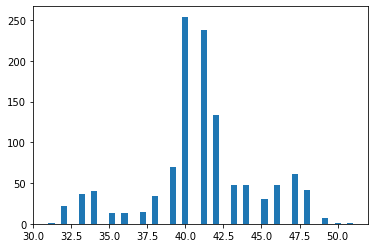

In [12]:
plt.hist(all_y_min, 50)

In [70]:
for name in os.listdir(os.path.join('./ML_heatmaps/foot_L/')):
    foot =  Image.open('./ML_heatmaps/foot_L/' + name)
    
    for i in range(37):
        for j in range(128):
            foot.putpixel((j,i), 0)
    
    foot.save('./ML_heatmaps/foot_mod_L/' + name)
    #show_cut(foot_arr, 37, rect=True)
